# 1교시

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.DataFrame({'a' : [8.6, 4.7, 3.8, 2.2, 4.6, 6.9, 4.3, 7.8, 5.6],
                   'b' : [167.4, 250.8, 325.6, 865.2, 754.1, 976, 478.2, 523.9, 602.2]}) 

In [5]:
df

,a,b
0,8.6,167.4
1,4.7,250.8
2,3.8,325.6
3,2.2,865.2
4,4.6,754.1
5,6.9,976.0
6,4.3,478.2
7,7.8,523.9
8,5.6,602.2


## 1. 각 열별 평균은?

In [9]:
df.mean(axis=0)

a      5.388889
b    549.266667
dtype: float64

## 1-1. 다음을 sklearn을 쓰지 않고 정규화하세요

In [12]:
(df - df.min(axis = 0)) / (df.max(axis = 0) - df.min(axis = 0)) 

,a,b
0,1.000000,0.000000
1,0.390625,0.103141
2,0.250000,0.195647
3,0.000000,0.862973
4,0.375000,0.725575
5,0.734375,1.000000
6,0.328125,0.384368
7,0.875000,0.440885
8,0.531250,0.537720


## 1-2. 다음을 sklearn을 쓰지 않고 표준화하세요

In [15]:
(df - df.mean()) / df.std()

,a,b
0,1.570867,-1.374703
1,-0.337003,-1.074467
2,-0.777280,-0.805190
3,-1.559996,1.137346
4,-0.385922,0.737391
5,0.739231,1.536221
6,-0.532681,-0.255837
7,1.179509,-0.091319
8,0.103275,0.190558


## 1-3. sklearn을 사용해서 정규화, 표준화를 하세요

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

st_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

st_scaler.fit(df)
print(st_scaler.transform(df))
print()
mm_scaler.fit(df)
print(mm_scaler.transform(df))


[[ 1.66615583 -1.45809291]
 [-0.3574452  -1.13964419]
 [-0.82443005 -0.85403312]
 [-1.65462534  1.20633769]
 [-0.4093324   0.78212124]
 [ 0.78407333  1.62940864]
 [-0.56499402 -0.27135598]
 [ 1.25105818 -0.0968583 ]
 [ 0.10953966  0.20211693]]

[[1.         0.        ]
 [0.390625   0.10314123]
 [0.25       0.1956468 ]
 [0.         0.86297304]
 [0.375      0.72557507]
 [0.734375   1.        ]
 [0.328125   0.38436804]
 [0.875      0.44088548]
 [0.53125    0.53771952]]


## 2. 

In [25]:
from pydataset import data

In [119]:
diamonds = data('diamonds')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 2-1. 'price' 칼럼을 100단위로 쪼개서 'price_cat' 이라는 새로운 칼럼을 만드세요

In [111]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [128]:
bins = list(range(0, 20000, 100))
diamonds['price_cat'] = pd.cut(diamonds['price'], bins)
diamonds 

,carat,cut,color,clarity,depth,table,price,x,y,z,price_cat
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,"(300, 400]"
2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,"(300, 400]"
3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,"(300, 400]"
4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,"(300, 400]"
5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,"(300, 400]"
...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50,"(2700, 2800]"
53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61,"(2700, 2800]"
53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56,"(2700, 2800]"
53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74,"(2700, 2800]"


In [120]:
bins = range(diamonds['price'].min()-100,diamonds['price'].max()+100,100)

In [121]:
diamonds['price_cat'] = pd.cut(diamonds['price'], bins)

In [122]:
diamonds['price_cat']

1          (226, 326]
2          (226, 326]
3          (326, 426]
4          (326, 426]
5          (326, 426]
             ...     
53936    (2726, 2826]
53937    (2726, 2826]
53938    (2726, 2826]
53939    (2726, 2826]
53940    (2726, 2826]
Name: price_cat, Length: 53940, dtype: category
Categories (186, interval[int64, right]): [(226, 326] < (326, 426] < (426, 526] < (526, 626] ... (18426, 18526] < (18526, 18626] < (18626, 18726] < (18726, 18826]]

## 2-2. 'cut' , 'color', 'clarity' 컬럼을 라벨인코딩하세요

In [124]:
from sklearn.preprocessing import LabelEncoder

In [129]:
encoder = LabelEncoder()
diamonds['cut'] = encoder.fit_transform(diamonds['cut'])
diamonds['color'] = encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = encoder.fit_transform(diamonds['clarity'])

In [138]:
diamonds['cut'].unique()

array([2, 3, 1, 4, 0], dtype=int64)

In [139]:
diamonds['color'].unique()

array([1, 5, 6, 4, 2, 3, 0], dtype=int64)

In [140]:
diamonds['clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1], dtype=int64)

## 2-3. target을 price_cat으로 하고 : y , price와 price_cat을 제외한 나머지 데이터에 대해 : X
### 7:3 비율로 train_set : train_set 
### DecisionTreeClassifier()을 사용하여, accuracy_score를 구하세요

In [134]:
diamonds[diamonds['cut'].str.contains("unknown")]

AttributeError: Can only use .str accessor with string values!

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = diamonds[['carat','cut','color','clarity','depth','table','x','y','z']]
y = diamonds['price_cat']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train,y_train)

pred = dt_clf.predict(X_test) 
accuracy_score(y_test, pred)


ValueError: Unknown label type: 'unknown'

In [142]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
27315,2.36,2,6,4,61.6,57.0,8.60,8.55,5.28
21252,1.56,2,6,4,61.9,55.0,7.44,7.46,4.61
53926,0.79,2,5,2,61.6,56.0,5.95,5.97,3.67
42340,0.73,4,3,0,62.5,58.0,5.74,5.82,3.61
19383,1.13,2,3,4,61.5,56.0,6.71,6.73,4.13
...,...,...,...,...,...,...,...,...,...
5074,0.93,3,4,2,61.8,59.0,6.27,6.23,3.86
32560,0.40,2,4,5,61.6,57.0,4.71,4.74,2.91
10480,1.09,3,3,3,61.1,59.0,6.69,6.63,4.07
35619,0.37,1,5,5,64.0,56.0,4.58,4.45,2.89


In [145]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
19885,1.20,4,2,5,61.1,59.0,6.81,6.87,4.18
12145,1.20,2,5,2,62.2,56.0,6.75,6.73,4.19
19533,1.50,1,4,5,63.9,59.0,7.25,7.18,4.61
49320,0.32,4,2,3,63.5,56.0,4.37,4.35,2.77
15727,1.00,3,3,4,62.3,58.0,6.39,6.30,3.95
...,...,...,...,...,...,...,...,...,...
45240,0.53,2,0,5,61.0,56.0,5.26,5.29,3.22
47543,0.52,2,2,4,61.6,56.0,5.20,5.16,3.18
30997,0.41,2,5,5,61.5,55.0,4.80,4.82,2.96
6143,0.90,1,4,5,63.1,60.0,6.08,6.12,3.85


In [141]:
y_train

34751        (800, 900]
31651        (700, 800]
17961      (7200, 7300]
37796       (900, 1000]
37144       (900, 1000]
              ...      
9071       (4500, 4600]
26742    (16500, 16600]
42906      (1300, 1400]
2598       (3200, 3300]
7087       (4100, 4200]
Name: price_cat, Length: 37758, dtype: category
Categories (199, interval[int64, right]): [(0, 100] < (100, 200] < (200, 300] < (300, 400] ... (19500, 19600] < (19600, 19700] < (19700, 19800] < (19800, 19900]]

In [146]:
y_test

22177    (10200, 10300]
22606    (10600, 10700]
37639       (900, 1000]
3140       (3300, 3400]
47816      (1900, 2000]
              ...      
10893      (4800, 4900]
25996    (15200, 15300]
37135       (900, 1000]
18965      (7800, 7900]
20287      (8700, 8800]
Name: price_cat, Length: 16182, dtype: category
Categories (199, interval[int64, right]): [(0, 100] < (100, 200] < (200, 300] < (300, 400] ... (19500, 19600] < (19600, 19700] < (19700, 19800] < (19800, 19900]]

In [143]:
y_train.astype('int64')

ValueError: Cannot cast interval[int64, right] dtype to int64

In [118]:
y = diamonds['price_cat']
x = diamonds.drop(['price','price_cat'], axis= 1)
dt_clf = DecisionTreeClassifier()
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)
dt_clf.fit(x_train,y_train)
accuracy_score(y_test,dt_clf.predict(x_test)) 

ValueError: Unknown label type: 'unknown'

## 3-1. 레이블 인코딩의 문제점은? (선형회귀에서는 사용할 수 없는 이유)

-> 일괄적으로 숫자 값으로 변환이 되면서 ML의 특성에 따라 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생해서
(숫자의 차이를 크고 작음을 나타내는 의미로 해석할 수 있어서)

## 3-2. 표준화와 정규화의 차이는?

-> 표준화 : 평균이 0, 표준편차가 1인 표준정규분포로 만드는 것 # 다른 분야에선 이것을 정규화라고 하는 경우도 있음

-> 정규화 : 최솟값 0, 최댓값이 1인 상태로 만드는 것

In [67]:
## 3-3. cake['recipe']를 원핫인코딩으로 바꾸세요

In [68]:

from sklearn.preprocessing import OneHotEncoder
# 판다스에서 제공해주는 함수, get_dummies()
pd.get_dummies(cake['recipe'])

NameError: name 'cake' is not defined

# 2교시 : precision, recall | 154p ~ 

### precision(정밀도)                    : $\frac{TP}{TP+FP}$ -> 1이라고 예측한 것 중 실제로 1인 것
### recall(재현율,TPR,민감도),sensitivity : $\frac{TP}{TP+FN}$ -> 실제로 1인 것 중에 1이라고 예측한 것
### FPR(False Positive Rate)                                  : $\frac{FP}{FP+TN}$ = 1 - 특이도 = FPR + 특이도 = 1 -> 실제로 0인 것 중에 1이라고 예측한 것
### specificity(특이도)                  : $\frac{TN}{FP+TN}$ -> 실제로 0인 것 중에 0이라고 예측한 것

# 3교시 : 156p ~

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [91]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [149]:
X = titanic.loc[:,['Pclass','SibSp','Fare']]
y = titanic['Survived']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
pred 

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [151]:
confusion_matrix(y_test, pred)

array([[148,  25],
       [ 49,  46]], dtype=int64)

In [152]:
accuracy_score(y_test, pred)

0.7238805970149254

In [153]:
precision_score(y_test, pred)

0.647887323943662

In [154]:
recall_score(y_test, pred)

0.4842105263157895

In [155]:
from sklearn.metrics import f1_score
f1_score(y_test,pred)

0.5542168674698795

In [156]:
def clf_eval(y_test, pred):
      from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
      conf = confusion_matrix(y_test, pred)
      acc = accuracy_score(y_test, pred)
      precision = precision_score(y_test, pred)
      rec = recall_score(y_test, pred)
      f1 = f1_score(y_test, pred)
      
      print(f"혼동행렬: \n {conf} \n 정확도: {acc} \n 정밀도: {precision} \n 재현율: {rec} \n f1: {f1}" )

In [157]:
clf_eval(y_test, pred)

혼동행렬: 
 [[148  25]
 [ 49  46]] 
 정확도: 0.7238805970149254 
 정밀도: 0.647887323943662 
 재현율: 0.4842105263157895 
 f1: 0.5542168674698795


# 5교시 : 172p ~ 

In [158]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
LR_clf = LogisticRegression(solver='liblinear')
LR_clf.fit(X_train, y_train)
pred = LR_clf.predict(X_test)
pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [160]:
def clf_eval(y_test, pred):
      from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
      acc = accuracy_score(y_test, pred)
      precision = precision_score(y_test, pred)
      rec = recall_score(y_test, pred)
      f1 = f1_score(y_test, pred)
      
      print(f"정확도: {acc} \n 정밀도: {precision} \n 재현율: {rec} \n f1: {f1}" )

In [161]:
clf_eval(y_test, pred)

정확도: 0.6791044776119403 
 정밀도: 0.6197183098591549 
 재현율: 0.42718446601941745 
 f1: 0.5057471264367815


In [163]:
LR_clf.predict_proba(X_test)[:5]

array([[0.71201606, 0.28798394],
       [0.06656075, 0.93343925],
       [0.46388677, 0.53611323],
       [0.63203162, 0.36796838],
       [0.31391136, 0.68608864]])

In [164]:
pred[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [166]:
np.round(LR_clf.predict_proba(X_test)[:,1])

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0.

In [168]:
arr = LR_clf.predict_proba(X_test)
arr[:5] 
# arr -> cut-off , thresholds, 임계점

array([[0.71201606, 0.28798394],
       [0.06656075, 0.93343925],
       [0.46388677, 0.53611323],
       [0.63203162, 0.36796838],
       [0.31391136, 0.68608864]])

In [169]:
np.where( arr < 0.5, 0 , 1)

array([[1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

In [170]:
result = np.where( arr < 0.5, 0 , 1)[:,1]
sum(y_test == result)/ len(result)

0.6791044776119403

## Binarizer 함수 

In [175]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold= 0.5)
binarizer.fit_transform(arr)[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

# 6교시 : 181p ~ 

In [1]:
from sklearn.tree import export_graphviz

In [2]:
import graphviz

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

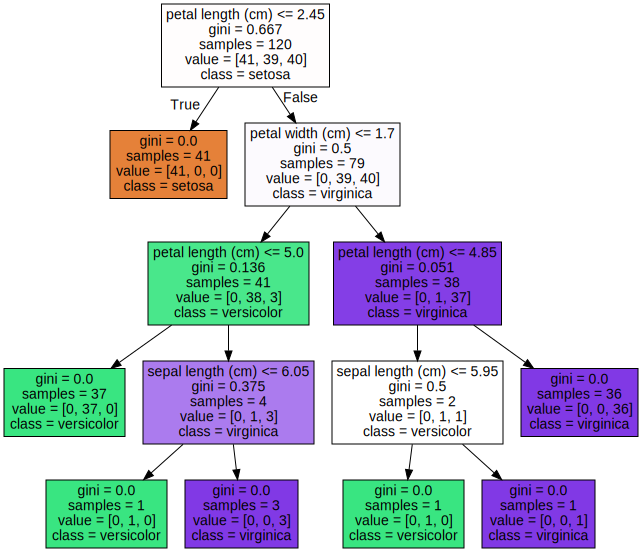

In [4]:
import graphviz
with open("tree.dot") as f:
      dot_graph = f.read()
graphviz.Source(dot_graph)